<a href="https://colab.research.google.com/github/juantijero/ML_HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

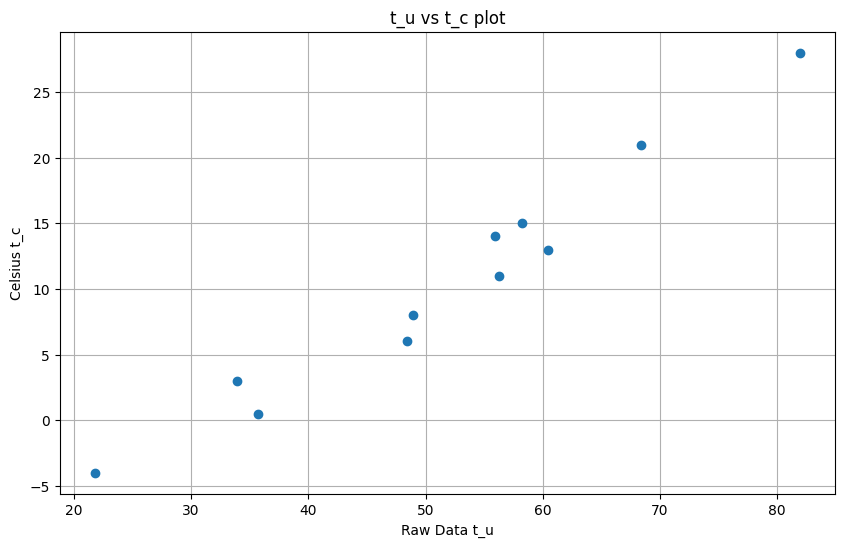

In [8]:
import torch
import matplotlib.pyplot as plt

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.title("t_u vs t_c plot")
plt.xlabel("Raw Data t_u")
plt.ylabel("Celsius t_c")
plt.grid(True)
plt.show()

Generating plot of 0-to-1 normalized data...


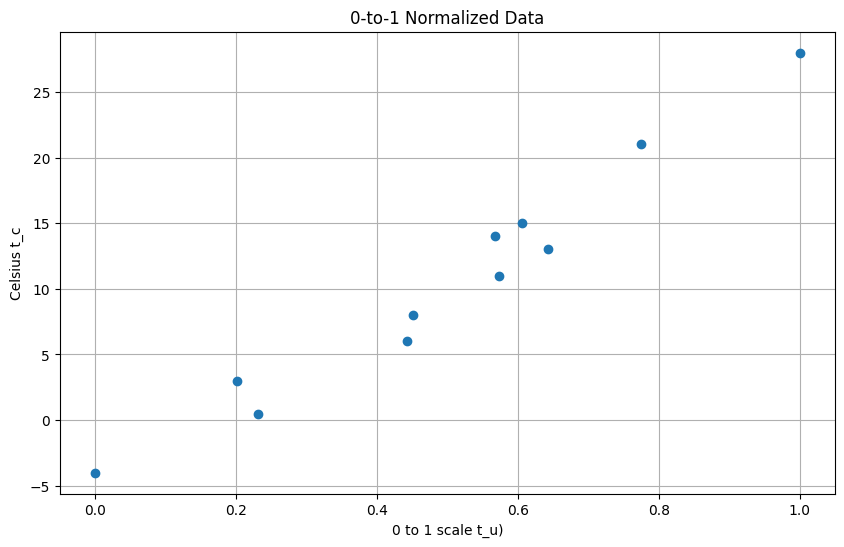

In [9]:
#Scaling and Normalization
t_u_min = t_u.min()
t_u_max = t_u.max()
t_u_norm = (t_u - t_u_min) / (t_u_max - t_u_min)

# --- Plotting the 0-to-1 Scaled Data ---
print("Generating plot of 0-to-1 normalized data...")
plt.figure(figsize=(10, 6))

# Plot the new t_u_norm (x-axis) vs. t_c (y-axis)
plt.plot(t_u_norm.numpy(), t_c.numpy(), 'o')

# --- Add labels ---
plt.title("0-to-1 Normalized Data")
plt.xlabel("0 to 1 scale t_u)")
plt.ylabel("Celsius t_c")
plt.grid(True)
plt.show()

Epoch 500, Loss: 2.2491
Epoch 1000, Loss: 2.1630
Epoch 1500, Loss: 2.1237
Epoch 2000, Loss: 2.1058
Epoch 2500, Loss: 2.0976
Epoch 3000, Loss: 2.0939
Epoch 3500, Loss: 2.0922
Epoch 4000, Loss: 2.0914
Epoch 4500, Loss: 2.0910
Epoch 5000, Loss: 2.0909
--- NEW BEST MODEL FOUND! Loss: 2.0909 ---
--- Winning Params (w2, w1, b): tensor([10.3518, 22.1648, -3.8813]) ---
Epoch 500, Loss: 7.9342
Epoch 1000, Loss: 3.0644
Epoch 1500, Loss: 2.4476
Epoch 2000, Loss: 2.3541
Epoch 2500, Loss: 2.3260
Epoch 3000, Loss: 2.3073
Epoch 3500, Loss: 2.2909
Epoch 4000, Loss: 2.2758
Epoch 4500, Loss: 2.2618
Epoch 5000, Loss: 2.2489
Epoch 500, Loss: 47.5100
Epoch 1000, Loss: 32.4626
Epoch 1500, Loss: 26.3780
Epoch 2000, Loss: 21.8214
Epoch 2500, Loss: 18.1495
Epoch 3000, Loss: 15.1729
Epoch 3500, Loss: 12.7588
Epoch 4000, Loss: 10.8008
Epoch 4500, Loss: 9.2126
Epoch 5000, Loss: 7.9243
Epoch 500, Loss: 152.5030
Epoch 1000, Loss: 125.8209
Epoch 1500, Loss: 105.4138
Epoch 2000, Loss: 89.7627
Epoch 2500, Loss: 77.717

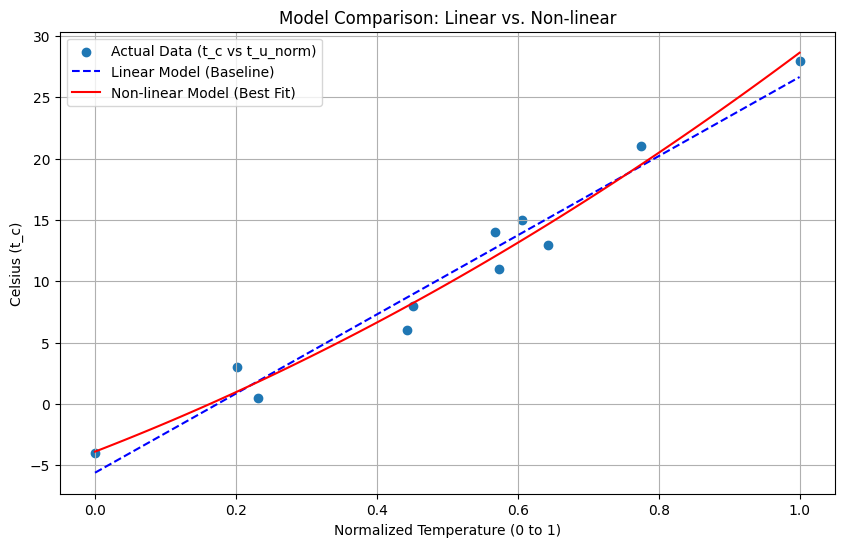

In [10]:
def model_nonlinear(t_u_input, w2, w1, b):
    return w2 * t_u_input**2 + w1 * t_u_input + b

def loss_fn_manual(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

best_params_nonlinear = None
min_final_loss = float('inf')

for lr in learning_rates:
    params = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)

    for epoch in range(1, n_epochs + 1):
        t_p = model_nonlinear(t_u_norm, params[0], params[1], params[2])
        loss = loss_fn_manual(t_p, t_c)

        if torch.isnan(loss):
            print(f"Epoch {epoch}: Loss exploded! (nan). Stopping this run.")
            break

        if params.grad is not None:
            params.grad.zero_()
        loss.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    final_loss = loss.item()
    if not torch.isnan(loss) and final_loss < min_final_loss:
        min_final_loss = final_loss
        best_params_nonlinear = params.detach().clone()
        print(f"--- NEW BEST MODEL FOUND! Loss: {final_loss:.4f} ---")
        print(f"--- Winning Params (w2, w1, b): {best_params_nonlinear} ---")

def model_linear(t_u_input, w, b):
    return w * t_u_input + b

params_linear = torch.tensor([32.0, -4.0], requires_grad=True)
loss_fn_linear = torch.nn.MSELoss()
lr_linear = 1e-2

for epoch in range(1, 5001):
    t_p_lin = model_linear(t_u_norm, params_linear[0], params_linear[1])
    loss_lin = loss_fn_linear(t_p_lin, t_c)

    if params_linear.grad is not None:
        params_linear.grad.zero_()
    loss_lin.backward()
    with torch.no_grad():
        params_linear -= lr_linear * params_linear.grad

final_loss_linear = loss_lin.item()
params_linear_final = params_linear.detach().clone()
print(f"Baseline Linear Model Final Loss: {final_loss_linear:.4f}")

print("\n--- Final Loss Comparison ---")
print(f"Baseline Linear Model:   {final_loss_linear:.4f}")
print(f"Best Non-linear Model: {min_final_loss:.4f}")

if min_final_loss < final_loss_linear:
    print("Result: The non-linear model is a better fit!")
else:
    print("Result: The linear model performed better (this is unexpected).")

print("\nGenerating plot...")

if best_params_nonlinear is None:
    print("Error: All training runs failed (loss was 'nan'). Cannot plot.")
else:
    w2, w1, b = best_params_nonlinear
    w_lin, b_lin = params_linear_final

    t_u_range = torch.linspace(t_u_norm.min(), t_u_norm.max(), 100)

    t_p_nonlinear_curve = model_nonlinear(t_u_range, w2, w1, b)
    t_p_linear_curve = model_linear(t_u_range, w_lin, b_lin)

    plt.figure(figsize=(10, 6))

    plt.scatter(t_u_norm.numpy(), t_c.numpy(), label="Actual Data (t_c vs t_u_norm)")

    plt.plot(t_u_range.numpy(), t_p_linear_curve.detach().numpy(),
             color='blue', linestyle='--', label="Linear Model (Baseline)")

    plt.plot(t_u_range.numpy(), t_p_nonlinear_curve.detach().numpy(),
             color='red', label="Non-linear Model (Best Fit)")

    plt.title("Model Comparison: Linear vs. Non-linear")
    plt.xlabel("Normalized Temperature (0 to 1)")
    plt.ylabel("Celsius (t_c)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import sys

print("\n--- 2.a: Preprocessing Data ---")

try:
    data = pd.read_csv('Housing.csv')
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Make sure it's in the same directory.")
    sys.exit()

input_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_col = ['price']

X = torch.tensor(data[input_cols].values, dtype=torch.float32)
y = torch.tensor(data[output_col].values, dtype=torch.float32)

print(f"Loaded {len(X)} data points.")
print(f"Original X[0]: {X[0]} (Features are on different scales!)")

X_min = X.min(dim=0, keepdim=True).values
X_max = X.max(dim=0, keepdim=True).values
X_norm = (X - X_min) / (X_max - X_min)

y_min = y.min()
y_max = y.max()
y_norm = (y - y_min) / (y_max - y_min)

print(f"Normalized X[0]: {X_norm[0]} (All features now 0-1)")

X_train, X_val, y_train, y_val = train_test_split(
    X_norm, y_norm, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} points")
print(f"Validation set size: {len(X_val)} points")

print("\n--- 2.a: Defining Model & Loss ---")

class HousingLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1)

    def forward(self, x):
        return self.linear(x)

loss_fn = nn.MSELoss()

print("Model and loss function are defined.")

print("\n--- 2.b: Running 4 Separate Trainings ---")

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
best_val_loss = float('inf')
best_model_params = None

for lr in learning_rates:
    print(f"\n--- EXPERIMENT START: Learning Rate = {lr} ---")

    model = HousingLinearModel()

    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(1, n_epochs + 1):

        model.train()

        y_pred = model(X_train)

        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        if epoch % 500 == 0:
            print(f"Epoch {epoch:4d} | Train Loss: {loss.item():.6f} | Val Loss: {val_loss.item():.6f}")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_params = model.state_dict()
        print(f"--- NEW BEST MODEL FOUND! Val Loss: {best_val_loss:.6f} ---")

print("\n--- Problem 2 Complete ---")
if best_model_params:
    print(f"The best model had a final validation loss of: {best_val_loss:.6f}")


--- 2.a: Preprocessing Data ---
Loaded 545 data points.
Original X[0]: tensor([7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]) (Features are on different scales!)
Normalized X[0]: tensor([0.3966, 0.6000, 0.3333, 0.6667, 0.6667]) (All features now 0-1)
Training set size: 436 points
Validation set size: 109 points

--- 2.a: Defining Model & Loss ---
Model and loss function are defined.

--- 2.b: Running 4 Separate Trainings ---

--- EXPERIMENT START: Learning Rate = 0.1 ---
Epoch  500 | Train Loss: 0.010310 | Val Loss: 0.017722
Epoch 1000 | Train Loss: 0.010128 | Val Loss: 0.017281
Epoch 1500 | Train Loss: 0.010120 | Val Loss: 0.017207
Epoch 2000 | Train Loss: 0.010120 | Val Loss: 0.017191
Epoch 2500 | Train Loss: 0.010120 | Val Loss: 0.017188
Epoch 3000 | Train Loss: 0.010120 | Val Loss: 0.017187
Epoch 3500 | Train Loss: 0.010120 | Val Loss: 0.017187
Epoch 4000 | Train Loss: 0.010120 | Val Loss: 0.017187
Epoch 4500 | Train Loss: 0.010120 | Val Loss: 0.017187
Epoch 5000 | T


--- Plotting 5 Feature vs. Price ---


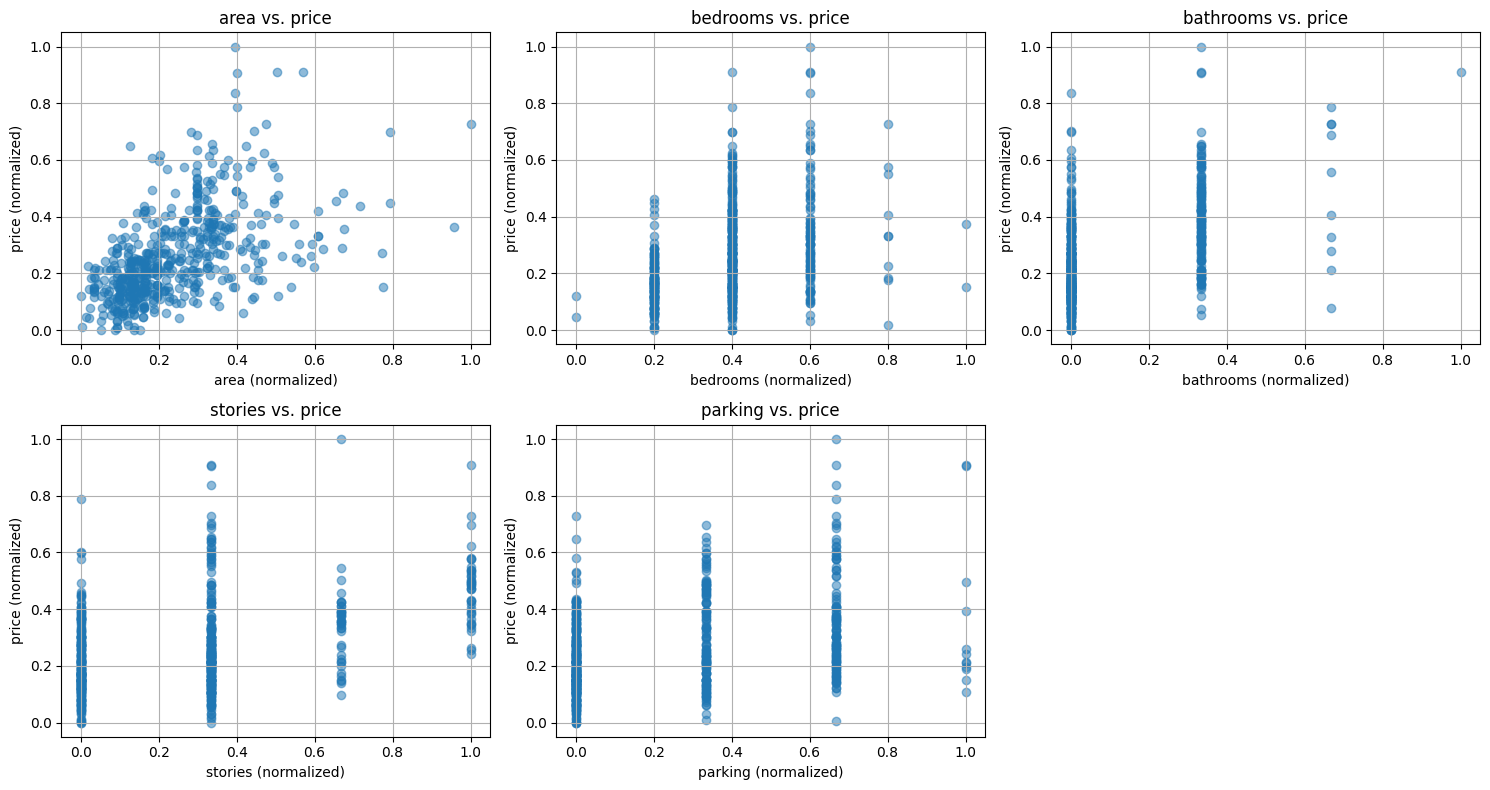

In [12]:
import matplotlib.pyplot as plt

print("\n--- Plotting 5 Feature vs. Price ---")

# We use the full normalized dataset for this
X_plot = X_norm.numpy()
y_plot = y_norm.numpy()

# Set up a 2x3 grid of plots
plt.figure(figsize=(15, 8))

for i in range(len(input_cols)):
    # Create a subplot for each feature
    plt.subplot(2, 3, i + 1)

    # Scatter plot for the i-th feature
    plt.scatter(X_plot[:, i], y_plot, alpha=0.5)

    plt.title(f"{input_cols[i]} vs. price")
    plt.xlabel(f"{input_cols[i]} (normalized)")
    plt.ylabel("price (normalized)")
    plt.grid(True)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()

In [14]:
print("\n--- 2.b: Running 4 Separate Trainings (and saving losses) ---")

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
best_val_loss = float('inf')
best_model_params = None

# <<< We'll store the loss history for the *best* model here
best_train_losses = []
best_val_losses = []

for lr in learning_rates:
    print(f"\n--- EXPERIMENT START: Learning Rate = {lr} ---")

    model = HousingLinearModel()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # <<< Create lists to store loss for *this* run
    current_train_losses = []
    current_val_losses = []

    for epoch in range(1, n_epochs + 1):

        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        # <<< Save the loss values for this epoch
        current_train_losses.append(loss.item())
        current_val_losses.append(val_loss.item())

        if epoch % 500 == 0:
            print(f"Epoch {epoch:4d} | Train Loss: {loss.item():.6f} | Val Loss: {val_loss.item():.6f}")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_params = model.state_dict()

        # <<< Save the loss history from this *best* run
        best_train_losses = current_train_losses
        best_val_losses = current_val_losses

        print(f"--- NEW BEST MODEL FOUND! Val Loss: {best_val_loss:.6f} ---")

print("\n--- Problem 2 Complete ---")
if best_model_params:
    print(f"The best model had a final validation loss of: {best_val_loss:.6f}")


--- 2.b: Running 4 Separate Trainings (and saving losses) ---

--- EXPERIMENT START: Learning Rate = 0.1 ---
Epoch  500 | Train Loss: 0.010319 | Val Loss: 0.017519
Epoch 1000 | Train Loss: 0.010130 | Val Loss: 0.017197
Epoch 1500 | Train Loss: 0.010120 | Val Loss: 0.017181
Epoch 2000 | Train Loss: 0.010120 | Val Loss: 0.017184
Epoch 2500 | Train Loss: 0.010120 | Val Loss: 0.017186
Epoch 3000 | Train Loss: 0.010120 | Val Loss: 0.017186
Epoch 3500 | Train Loss: 0.010120 | Val Loss: 0.017186
Epoch 4000 | Train Loss: 0.010120 | Val Loss: 0.017186
Epoch 4500 | Train Loss: 0.010120 | Val Loss: 0.017186
Epoch 5000 | Train Loss: 0.010120 | Val Loss: 0.017186
--- NEW BEST MODEL FOUND! Val Loss: 0.017186 ---

--- EXPERIMENT START: Learning Rate = 0.01 ---
Epoch  500 | Train Loss: 0.011502 | Val Loss: 0.019786
Epoch 1000 | Train Loss: 0.010974 | Val Loss: 0.018718
Epoch 1500 | Train Loss: 0.010690 | Val Loss: 0.018169
Epoch 2000 | Train Loss: 0.010511 | Val Loss: 0.017850
Epoch 2500 | Train Loss


--- Plotting Training vs. Validation Loss Curve ---


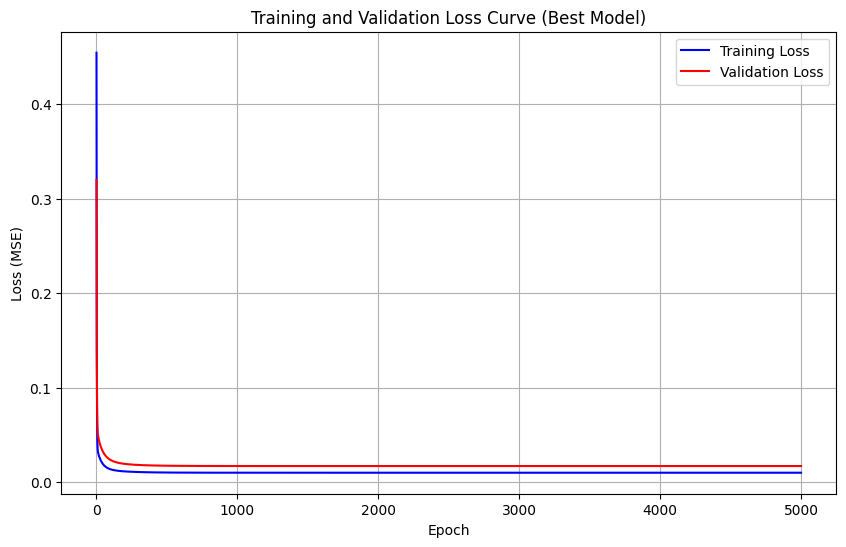

In [15]:
import matplotlib.pyplot as plt

print("\n--- Plotting Training vs. Validation Loss Curve ---")

# Create a list of epoch numbers (e.g., [1, 2, 3, ..., 5000])
epochs_range = range(1, n_epochs + 1)

plt.figure(figsize=(10, 6))

# Plot the training loss
plt.plot(epochs_range, best_train_losses, 'b-', label='Training Loss')

# Plot the validation loss
plt.plot(epochs_range, best_val_losses, 'r-', label='Validation Loss')

plt.title('Training and Validation Loss Curve (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import sys

# ===================================================================
# --- 1. Preprocessing (Same as Problem 2) ---
# ===================================================================
print("\n--- 1. Preprocessing Data ---")

try:
    data = pd.read_csv('Housing.csv')
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Make sure it's in the same directory.")
    sys.exit()

input_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_col = ['price']

X = torch.tensor(data[input_cols].values, dtype=torch.float32)
y = torch.tensor(data[output_col].values, dtype=torch.float32)

X_min = X.min(dim=0, keepdim=True).values
X_max = X.max(dim=0, keepdim=True).values
X_norm = (X - X_min) / (X_max - X_min)

y_min = y.min()
y_max = y.max()
y_norm = (y - y_min) / (y_max - y_min)

X_train, X_val, y_train, y_val = train_test_split(
    X_norm, y_norm, test_size=0.2, random_state=42
)

print(f"Data loaded and split: {len(X_train)} train, {len(X_val)} val")

# This is our baseline score from Problem 2 (use your own best score)
baseline_linear_loss = 0.017186
print(f"Baseline Linear Model Loss to Beat: {baseline_linear_loss:.6f}")

# ===================================================================
# --- Helper Function for Training ---
# ===================================================================

def train_model(model, n_epochs, lr):
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Store loss history for plotting/analysis
    train_losses = []
    val_losses = []

    print(f"\n--- Training {model.__class__.__name__} for {n_epochs} epochs... ---")

    for epoch in range(1, n_epochs + 1):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
            val_losses.append(val_loss.item())

        if epoch % 50 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch:4d} | Train Loss: {loss.item():.6f} | Val Loss: {val_loss.item():.6f}")

    print("--- Training Complete ---")
    return train_losses, val_losses

# Helper to count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# ===================================================================
# --- Problem 3.a: Build a 1-hidden-layer Network ---
# ===================================================================
print("\n--- Problem 3.a ---")

class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(5, 8)  # 5 inputs, 8 hidden nodes
        self.relu = nn.ReLU()
        self.layer_out = nn.Linear(8, 1) # 8 hidden nodes, 1 output

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer_out(x)
        return x

net1 = Net1()
print(f"Model 1 (Net1) Architecture: {net1}")
print(f"Model 1 Parameters: {count_parameters(net1)}")

# Train the model
train_losses_net1, val_losses_net1 = train_model(net1, n_epochs=200, lr=0.01)

# ===================================================================
# --- Problem 3.b: Extend Network with 2 More Hidden Layers ---
# ===================================================================
print("\n--- Problem 3.b ---")

class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(5, 8) # 5 inputs, 8 hidden nodes
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 8) # 1st additional hidden layer
        self.layer3 = nn.Linear(8, 8) # 2nd additional hidden layer
        self.layer_out = nn.Linear(8, 1) # 8 hidden nodes, 1 output

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x)) # Pass through new layer 2
        x = self.relu(self.layer3(x)) # Pass through new layer 3
        x = self.layer_out(x)
        return x

net2 = Net2()
print(f"Model 2 (Net2) Architecture: {net2}")
print(f"Model 2 Parameters: {count_parameters(net2)}")

# Train the model
train_losses_net2, val_losses_net2 = train_model(net2, n_epochs=200, lr=0.01)

# ===================================================================
# --- Final Analysis ---
# ===================================================================
print("\n--- Final Model Comparison ---")
print(f"Baseline Linear Model (Prob 2) Val Loss: {baseline_linear_loss:.6f}")
print(f"Net1 (1-Layer NN) Final Val Loss:      {val_losses_net1[-1]:.6f}")
print(f"Net2 (3-Layer NN) Final Val Loss:      {val_losses_net2[-1]:.6f}")

print("\n--- Problem 3 Complete ---")


--- 1. Preprocessing Data ---
Data loaded and split: 436 train, 109 val
Baseline Linear Model Loss to Beat: 0.017186

--- Problem 3.a ---
Model 1 (Net1) Architecture: Net1(
  (layer1): Linear(in_features=5, out_features=8, bias=True)
  (relu): ReLU()
  (layer_out): Linear(in_features=8, out_features=1, bias=True)
)
Model 1 Parameters: 57

--- Training Net1 for 200 epochs... ---
Epoch   50 | Train Loss: 0.011413 | Val Loss: 0.017941
Epoch  100 | Train Loss: 0.010451 | Val Loss: 0.017563
Epoch  150 | Train Loss: 0.010171 | Val Loss: 0.017281
Epoch  200 | Train Loss: 0.010111 | Val Loss: 0.017169
--- Training Complete ---

--- Problem 3.b ---
Model 2 (Net2) Architecture: Net2(
  (layer1): Linear(in_features=5, out_features=8, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=1, bias=True)
)
Model 2 Parameters: 201

--- Training Net2 for 200